In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
file_path = "/content/drive/MyDrive/Income.csv"
my_df = pd.read_csv(file_path)
my_df.head()

,Name,Age,Income
0,A,59,161517
1,dfsd,26,166137
2,fwef,42,188842
3,few,32,82330
4,ff,74,178297


In [ ]:
plt.scatter(my_df['Age'], my_df['Income'])

In [25]:
my_df = my_df.drop(columns=['Name'])
my_df

,Age,Income
0,59,161517
1,26,166137
2,42,188842
3,32,82330
4,74,178297
...,...,...
168,34,128248
169,33,139333
170,63,181281
171,67,163624


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
#Fit and predict
my_df['Cluster']= km.fit_predict(my_df)
# my_df['Cluster'] = km.fit_predict(my_df[['Age', 'Income']])
my_df


In [31]:
km.cluster_centers_

array([[4.83636364e+01, 1.70791164e+05],
       [5.41475410e+01, 9.91664098e+04],
       [5.24385965e+01, 1.34416649e+05]])

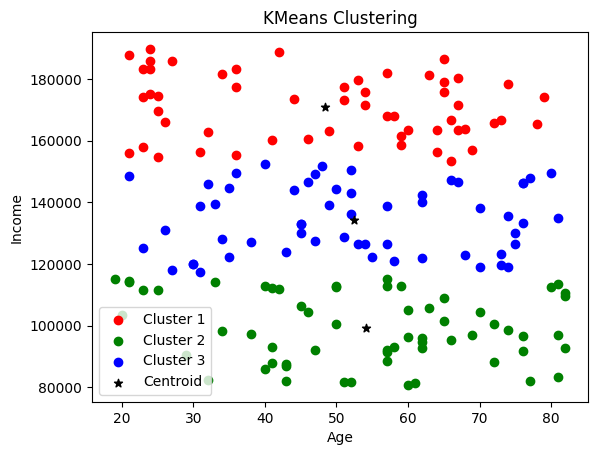

In [35]:
# Visualize the Clusters
df0 = my_df[my_df['Cluster'] == 0]
df1 = my_df[my_df['Cluster'] == 1]
df2 = my_df[my_df['Cluster'] == 2]

plt.scatter(df0['Age'], df0['Income'], color='red', label='Cluster 1')
plt.scatter(df1['Age'], df1['Income'], color='green', label='Cluster 2')
plt.scatter(df2['Age'], df2['Income'], color='blue', label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [36]:
rng = range(1,10)
sse = []
for k in rng:
  km = KMeans(n_clusters=k)
  km.fit(my_df)
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [37]:
sse

[168299495259.91907,
 40791801153.7384,
 19860840521.69831,
 9854222287.99884,
 6631974305.731559,
 4355036504.73744,
 3323435438.853037,
 2672110379.739402,
 1977451793.5925465]

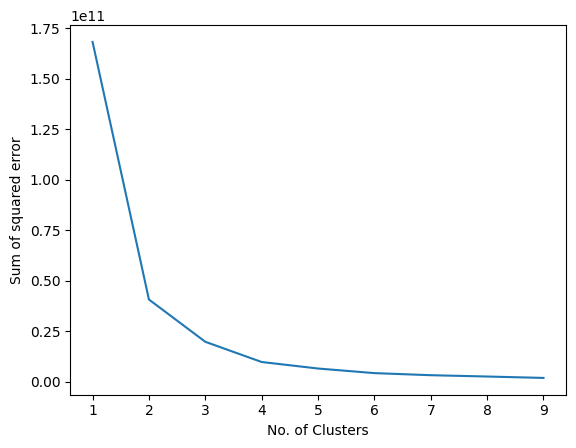

In [39]:
plt.plot(rng, sse)
plt.ylabel('Sum of squared error')
plt.xlabel('No. of Clusters')
plt.show()